In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.6 MB/s eta 0:00:00


In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=ed3511783dfe38a819d5c927693321ce18b113be9fa7ee73ab1f8d9a6d78fb97
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm
Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

EXT1	I am the life of the party.
EXT2	I don't talk a lot.
EXT3	I feel comfortable around people.
EXT4	I keep in the background.
EXT5	I start conversations.
EXT6	I have little to say.
EXT7	I talk to a lot of different people at parties.
EXT8	I don't like to draw attention to myself.
EXT9	I don't mind being the center of attention.
EXT10	I am quiet around strangers.
EST1	I get stressed out easily.
EST2	I am relaxed most of the time.
EST3	I worry about things.
EST4	I seldom feel blue.
EST5	I am easily disturbed.
EST6	I get upset easily.
EST7	I change my mood a lot.
EST8	I have frequent mood swings.
EST9	I get irritated easily.
EST10	I often feel blue.
AGR1	I feel little concern for others.
AGR2	I am interested in people.
AGR3	I insult people.
AGR4	I sympathize with others' feelings.
AGR5	I am not interested in other people's problems.
AGR6	I have a soft heart.
AGR7	I am not really interested in others.
AGR8	I take time out for others.
AGR9	I feel others' emotions.
AGR10	I make people feel at ease.
CSN1	I am always prepared.
CSN2	I leave my belongings around.
CSN3	I pay attention to details.
CSN4	I make a mess of things.
CSN5	I get chores done right away.
CSN6	I often forget to put things back in their proper place.
CSN7	I like order.
CSN8	I shirk my duties.
CSN9	I follow a schedule.
CSN10	I am exacting in my work.
OPN1	I have a rich vocabulary.
OPN2	I have difficulty understanding abstract ideas.
OPN3	I have a vivid imagination.
OPN4	I am not interested in abstract ideas.
OPN5	I have excellent ideas.
OPN6	I do not have a good imagination.
OPN7	I am quick to understand things.
OPN8	I use difficult words.
OPN9	I spend time reflecting on things.
OPN10	I am full of ideas.

The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.

dateload    The timestamp when the survey was started.
screenw     The width the of user's screen in pixels
screenh     The height of the user's screen in pixels
introelapse The time in seconds spent on the landing / intro page
testelapse  The time in seconds spent on the page with the survey questions
endelapse   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)
IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions
country     The country, determined by technical information (NOT ASKED AS A QUESTION)
lat_appx_lots_of_err    approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information
long_appx_lots_of_err   approximate longitude of user


In [ ]:
import pandas as pandd
import pandas as pd
import pycountry
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot as pltt
import seaborn as sens
warnings.filterwarnings("ignore")

In [ ]:
Fivefac1 = pandd.read_csv("/content/drive/MyDrive/BigFivePersonalitydata.csv")
Fivefac1.head()

,Unnamed: 0,id,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,target
0,0,441310,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,...,1920.0,1080.0,7.0,186.0,21,1,US,35.057,-79.0147,C
1,1,985842,3.0,4.0,4.0,3.0,2.0,3.0,5.0,2.0,...,1366.0,768.0,15.0,133.0,7,14,SG,1.2931,103.8558,N
2,2,628988,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,...,1680.0,1050.0,3.0,286.0,16,11,HK,22.25,114.1667,N
3,3,704960,3.0,3.0,2.0,3.0,3.0,4.0,1.0,3.0,...,1920.0,1080.0,36.0,184.0,12,1,PH,10.6,123.0333,C
4,4,409388,3.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,...,1280.0,800.0,5.0,494.0,19,1,CA,43.6425,-79.3872,N


In [ ]:
Fivefac = Fivefac1

In [ ]:
#Datatype of each column
dict(Fivefac.dtypes)

{'Unnamed: 0': dtype('int64'),
 'id': dtype('int64'),
 'EXT1': dtype('float64'),
 'EXT2': dtype('float64'),
 'EXT3': dtype('float64'),
 'EXT4': dtype('float64'),
 'EXT5': dtype('float64'),
 'EXT6': dtype('float64'),
 'EXT7': dtype('float64'),
 'EXT8': dtype('float64'),
 'EXT9': dtype('float64'),
 'EXT10': dtype('float64'),
 'EST1': dtype('float64'),
 'EST2': dtype('float64'),
 'EST3': dtype('float64'),
 'EST4': dtype('float64'),
 'EST5': dtype('float64'),
 'EST6': dtype('float64'),
 'EST7': dtype('float64'),
 'EST8': dtype('float64'),
 'EST9': dtype('float64'),
 'EST10': dtype('float64'),
 'AGR1': dtype('float64'),
 'AGR2': dtype('float64'),
 'AGR3': dtype('float64'),
 'AGR4': dtype('float64'),
 'AGR5': dtype('float64'),
 'AGR6': dtype('float64'),
 'AGR7': dtype('float64'),
 'AGR8': dtype('float64'),
 'AGR9': dtype('float64'),
 'AGR10': dtype('float64'),
 'CSN1': dtype('float64'),
 'CSN2': dtype('float64'),
 'CSN3': dtype('float64'),
 'CSN4': dtype('float64'),
 'CSN5': dtype('float64')

In [ ]:
last_10_cols = Fivefac.iloc[:, -12:]
data_types = last_10_cols.dtypes

print(data_types)

OPN10_E                  float64
dateload                  object
screenw                  float64
screenh                  float64
introelapse              float64
testelapse               float64
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
target                    object
dtype: object


In [ ]:
Fivefac["date_column"] = pandd.to_datetime(Fivefac["dateload"], format="%Y-%m-%d %H:%M:%S")
Fivefac = Fivefac.drop('dateload', axis=1)

In [ ]:
Fivefac["lat_appx_lots_of_err"] = pandd.to_numeric(Fivefac["lat_appx_lots_of_err"], errors="coerce").astype(float)
Fivefac["long_appx_lots_of_err"] = pandd.to_numeric(Fivefac["long_appx_lots_of_err"], errors="coerce").astype(float)
Fivefac["country"] = Fivefac["country"].astype(str)
Fivefac["target"] = Fivefac["target"].astype(str)

In [ ]:
#Data type information for each variable in our dataset
Fivefac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964573 entries, 0 to 964572
Columns: 113 entries, Unnamed: 0 to date_column
dtypes: datetime64[ns](1), float64(106), int64(4), object(2)
memory usage: 831.6+ MB


In [ ]:
Fivefac.describe(include='all')

,Unnamed: 0,id,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,...,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,target,date_column
count,964573.000000,9.645730e+05,962863.000000,962863.000000,962863.000000,962863.000000,962863.000000,962863.000000,962863.000000,962863.000000,...,962611.000000,9.626110e+05,9.628630e+05,9.645730e+05,964573.000000,964573,951544.000000,951544.000000,964573,964573
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,224,NaN,NaN,6,951304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,C,2018-09-07 08:58:05
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,519009,NaN,NaN,277520,9
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 02:01:01
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-08 12:08:45
mean,482286.000000,5.076880e+05,2.647965,2.772884,3.288141,3.140707,3.277330,2.400889,2.771749,3.414710,...,826.316675,9.574240e+02,6.604749e+02,2.777027e+03,10.447649,NaN,32.701402,-39.205890,NaN,NaN
std,278448.384939,2.930907e+05,1.264292,1.323763,1.215109,1.237310,1.277449,1.225707,1.400459,1.271566,...,180.259150,5.191203e+04,1.582476e+04,1.522389e+06,39.792091,NaN,22.409466,80.393729,NaN,NaN
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,NaN,-90.000000,-175.333300,NaN,NaN
25%,241143.000000,2.539070e+05,1.500000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,720.000000,5.000000e+00,1.710000e+02,9.000000e+00,1.000000,NaN,32.801900,-97.000000,NaN,NaN


In [ ]:
pd.DataFrame({'mean':Fivefac.mean(), 'sd':Fivefac.std(),'min':Fivefac.min(),
             'max':Fivefac.max(), 'median':Fivefac.median(), 'length':len(Fivefac),
             'miss.val':Fivefac.isnull().sum()})

,mean,sd,min,max,median,length,miss.val
AGR1,2.255286,1.340018,0.0,5.0,2.0000,964573,1710
AGR10,3.592688,1.08071,0.0,5.0,4.0000,964573,1710
AGR10_E,6098.791233,312378.394769,-85674.0,240623400.0,3334.0000,964573,1710
AGR1_E,18399.509727,1772232.652476,-2757521.0,1170859400.0,4361.0000,964573,1710
AGR2,3.831346,1.140567,0.0,5.0,4.0000,964573,1710
...,...,...,...,...,...,...,...
long_appx_lots_of_err,-39.205890,80.393729,-175.3333,178.4167,-78.8986,964573,13029
screenh,826.316675,180.25915,0.0,8802.0,768.0000,964573,1962
screenw,1149.458188,560.045737,0.0,13660.0,1366.0000,964573,1962
target,NaN,NaN,A,nan,NaN,964573,0


In [ ]:
Fivefac = Fivefac.iloc[:, 2:]
Fivefac.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,target,date_column
0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,...,1080.0,7.0,186.0,21,1,US,35.0570,-79.0147,C,2017-06-25 19:21:21
1,3.0,4.0,4.0,3.0,2.0,3.0,5.0,2.0,4.0,4.0,...,768.0,15.0,133.0,7,14,SG,1.2931,103.8558,N,2018-10-24 08:10:07
2,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,2.0,5.0,...,1050.0,3.0,286.0,16,11,HK,22.2500,114.1667,N,2018-02-26 18:56:06
3,3.0,3.0,2.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,...,1080.0,36.0,184.0,12,1,PH,10.6000,123.0333,C,2018-04-16 14:24:53
4,3.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,4.0,5.0,...,800.0,5.0,494.0,19,1,CA,43.6425,-79.3872,N,2017-04-29 15:10:55


In [ ]:
# Create a dictionary of country code to country name mappings
country_dict = {}
for country in pycountry.countries:
    country_dict[country.alpha_2] = country.name

# Map the Alpha-2 codes to country names
Fivefac['Countries'] = Fivefac['country'].map(country_dict)

#Remove Country column
Fivefac = Fivefac.drop("country", axis=1)

In [ ]:
Fivefac["screen_size"] = (Fivefac["screenw"] ** 2 + Fivefac["screenh"] ** 2) ** 0.5

#Removing Screen width and screen height column
Fivefac = Fivefac.drop("screenw", axis=1)
Fivefac = Fivefac.drop("screenh", axis=1)

In [ ]:
tab_threshold = 7
phone_min_threshold = 4
phone_max_threshold = 7

# Create a new column for device type based on screen size
Fivefac["device_type"] = pandd.cut(Fivefac["screen_size"], 
                           bins=[0, phone_min_threshold, phone_max_threshold, float("inf")], 
                           labels=["Desktop", "Mobile", "Tab"])

Fivefac["device_type"][Fivefac.screen_size <=800] = "Mobile"
Fivefac["device_type"][(Fivefac.screen_size <= 1600) & (Fivefac.screen_size>800)] = "Tab"
Fivefac["device_type"][Fivefac.screen_size >1600] = "Desktop"


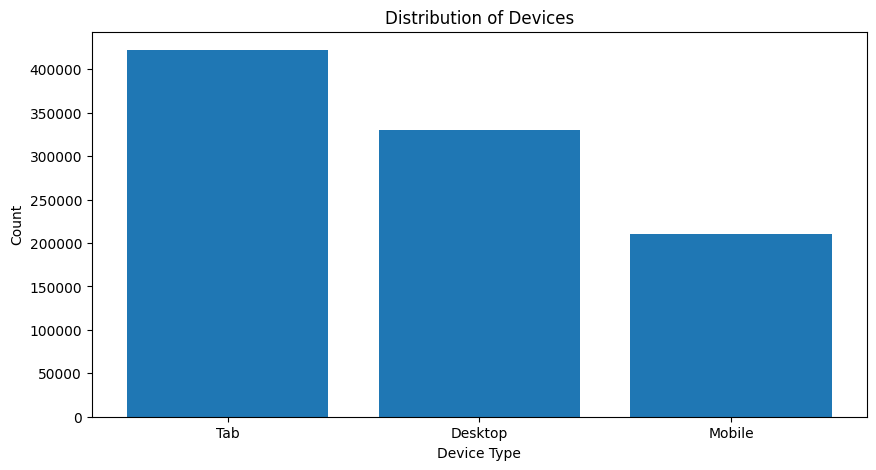

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
counts = Fivefac["device_type"].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.title('Distribution of Devices')

# Show the plot
plt.show()

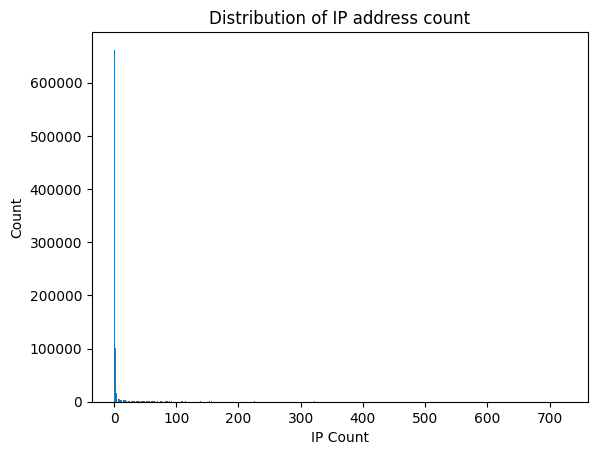

In [ ]:
counts = Fivefac["IPC"].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('IP Count')
plt.ylabel('Count')
plt.title('Distribution of IP address count')

# Show the plot
plt.show()

In [ ]:
Fivefac.drop(Fivefac.index[Fivefac['IPC'] != 1], inplace = True)
Fivefac['IPC'].describe()
Fivefac = Fivefac.drop("IPC", axis=1)

In [ ]:
Fivefac["Time consumed"] = Fivefac["introelapse"] + Fivefac["testelapse"] + Fivefac["endelapse"]
Fivefac = Fivefac.drop("introelapse", axis=1)
Fivefac = Fivefac.drop("testelapse", axis=1)
Fivefac = Fivefac.drop("endelapse", axis=1)

In [ ]:
Fivefac = Fivefac.drop_duplicates()

In [ ]:
nullv = Fivefac.isnull().sum() + Fivefac.isna().sum() #Null and nun Values
null_percent = nullv* 100 / len(Fivefac) #Percentage of null values
nullv_df = pandd.DataFrame({'column_name': Fivefac.columns,'nullv_values': nullv,'percent_nullv (%)': null_percent})
nullv_df.sort_values('nullv_values', inplace=True,ascending=False)
nullv_df

,column_name,nullv_values,percent_nullv (%)
Countries,Countries,18396,2.778886
long_appx_lots_of_err,long_appx_lots_of_err,18256,2.757737
lat_appx_lots_of_err,lat_appx_lots_of_err,18256,2.757737
Time consumed,Time consumed,3618,0.546532
device_type,device_type,2290,0.345926
...,...,...,...
CSN1,CSN1,2196,0.331726
AGR10,AGR10,2196,0.331726
EXT5_E,EXT5_E,2196,0.331726
target,target,0,0.000000


In [ ]:
Fivefac = Fivefac.dropna(subset=['lat_appx_lots_of_err'])
Fivefac = Fivefac.dropna(subset=['long_appx_lots_of_err'])

In [ ]:
import requests

# select rows with missing 'country' values
missing_data = Fivefac[Fivefac['Countries'].isna()]

# loop through each row and get the country value using the 'lat' and 'long' columns
for index, row in missing_data.iterrows():
    if (str(row["lat_appx_lots_of_err"]) != "nan") & (str(row["long_appx_lots_of_err"]) != "nan"):
        url = f'https://nominatim.openstreetmap.org/reverse?format=jsonv2&lat={row["lat_appx_lots_of_err"]}&lon={row["long_appx_lots_of_err"]}'
        try:
            response = requests.get(url).json()
        except:
            pass
        country = response['address']['country']
        Fivefac.at[index, 'Countries'] = country

In [ ]:
Fivefac = Fivefac.drop("lat_appx_lots_of_err", axis=1)
Fivefac = Fivefac.drop("long_appx_lots_of_err", axis=1)

In [ ]:
#Dropping the Null values
Fivefac = Fivefac.dropna()
Fivefac.isnull().sum().any()

False

In [ ]:
Fivefac.iloc[:,50:100] = Fivefac.iloc[:,50:100][(Fivefac.iloc[:,50:100] > 0).all(1)] #Answers should be between 1-5.
Fivefac= Fivefac.dropna()

In [ ]:
#The time columns are measured in miliseconds, and needs to convert them to seconds format.
Fivefac.iloc[:,50:100] = Fivefac.iloc[:,50:100].divide(1000, axis = 'rows')
Fivefac.iloc[:,50:100]

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
3,8.624,2.872,5.600,3.152,5.775,1.753,4.208,5.648,7.136,1.704,...,2.287,4.529,2.440,2.176,2.832,2.864,1.889,2.032,2.976,0.544
5,6.104,6.800,9.608,4.903,7.128,4.103,6.194,12.332,6.184,4.375,...,2.261,9.867,8.887,3.440,2.176,4.490,4.361,2.264,3.617,1.784
6,18.124,3.265,4.351,5.213,4.557,3.280,7.985,8.316,3.831,14.332,...,5.200,12.331,5.740,4.318,7.449,7.166,6.059,3.805,3.269,6.284
9,415.090,6.274,5.648,6.534,2.266,2.662,5.214,4.602,4.116,2.524,...,3.504,5.696,3.018,9.388,8.514,8.082,13.366,3.024,4.224,2.870
10,9.913,4.850,3.067,5.149,2.818,2.657,21.011,6.667,5.437,4.240,...,4.674,5.763,3.466,3.407,7.731,6.203,5.778,5.269,23.206,3.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964568,3.199,1.369,2.831,2.084,9.359,2.681,4.443,2.213,5.905,1.483,...,3.141,7.862,2.022,1.929,1.935,3.038,3.419,2.222,5.454,1.204
964569,5.796,2.856,3.753,2.467,2.366,2.851,5.017,7.421,2.905,2.044,...,8.089,3.115,2.253,3.089,2.281,2.212,0.969,3.269,4.595,1.236
964570,7.829,2.525,1.822,1.311,1.739,2.213,2.768,3.026,2.471,1.754,...,1.729,2.615,1.853,2.451,0.655,1.927,2.135,2.547,1.184,1.495
964571,38.281,3.046,5.615,2.685,3.667,3.367,34.798,4.067,3.184,4.614,...,2.836,3.494,2.450,3.016,2.770,4.235,3.020,4.233,2.921,2.382


In [ ]:
Fivefac.describe(include='all')

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,target,date_column,Countries,screen_size,device_type,Time consumed
count,561307.000000,561307.000000,561307.000000,561307.000000,561307.000000,561307.000000,561307.000000,561307.000000,561307.000000,561307.000000,...,561307.000000,561307.000000,561307.000000,561307.000000,561307,561307,561307,561307.000000,561307,5.613070e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,557894,221,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C,2017-12-01 10:12:37,United States,NaN,Tab,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,169025,6,283929,NaN,235065,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-03-03 02:01:01,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018-11-08 12:08:45,NaN,NaN,NaN,NaN
mean,2.578202,2.846296,3.231681,3.218479,3.249507,2.422745,2.712316,3.469342,2.953642,3.621590,...,7.683305,4.767690,5.605432,4.295949,NaN,NaN,NaN,1419.241667,NaN,5.490912e+03
std,1.237493,1.305236,1.191222,1.204966,1.246406,1.213692,1.370098,1.238657,1.324325,1.263968,...,678.531259,95.310152,202.074884,189.468918,NaN,NaN,NaN,533.349046,NaN,1.996050e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.001000,0.001000,0.001000,NaN,NaN,NaN,0.000000,NaN,3.000000e+01
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000,...,2.303000,2.173000,2.351000,1.498000,NaN,NaN,NaN,822.921624,NaN,2.010000e+02


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import pandas as pd
bestfeatures = SelectKBest(k=60)
fit = bestfeatures.fit(Fivefac.iloc[:,0:100],Fivefac['target'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Fivefac.drop('target',axis=1).columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
(featureScores.sort_values(by='Score',ascending=False)).T

,38,17,30,15,16,35,34,18,19,41,...,63,89,91,98,81,100,101,102,103,104
Feature,CSN9,EST8,CSN1,EST6,EST7,CSN6,CSN5,EST9,EST10,OPN2,...,EST4_E,CSN10_E,OPN2_E,OPN9_E,CSN2_E,date_column,Countries,screen_size,device_type,Time consumed
Score,21121.975418,18884.945081,18381.749126,18347.271712,16137.336988,16081.020203,14517.72161,13674.514354,13535.099541,12832.49538,...,0.32217,0.230478,0.215579,0.148126,0.112641,NaN,NaN,NaN,NaN,NaN


In [ ]:
categories = {'Extroversion': 'EXT', 'Neuroticism': 'EST', 'Openness': 'OPN', 'Conscientiousness': 'CSN', 'Agreeableness': 'AGR'}
# Creating a dictionary for the category names and their corresponding prefixes.

for category, prefix in categories.items():
    Fivefac[category] = Fivefac.filter(regex=f'^{prefix}', axis=1).sum(axis=1)
# Using the filter method to select the columns with the given prefix, then summing them along the row axis.


In [ ]:
#Columns having data of participants response on scale of 1 to 5
question_Fivefac = (Fivefac.iloc[:, 0:50])
question_Fivefac = question_Fivefac[(question_Fivefac > 0).all(1)] #Answers should be between 1-5.
question_Fivefac['target'] = Fivefac['target']
question_Fivefac

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,target
3,3.0,3.0,2.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,...,4.0,3.0,3.0,3.0,2.0,3.0,3.0,5.0,3.0,C
5,3.0,3.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,...,3.0,4.0,1.0,5.0,1.0,5.0,4.0,1.0,5.0,C
6,3.0,2.0,4.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,...,2.0,4.0,1.0,4.0,1.0,4.0,5.0,5.0,4.0,N
9,2.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,2.0,5.0,...,2.0,4.0,1.0,2.0,2.0,2.0,4.0,5.0,4.0,C
10,1.0,5.0,4.0,5.0,1.0,5.0,1.0,1.0,4.0,5.0,...,4.0,2.0,3.0,2.0,4.0,3.0,1.0,2.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964568,1.0,3.0,3.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,...,2.0,4.0,2.0,4.0,2.0,4.0,2.0,3.0,3.0,N
964569,1.0,4.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0,4.0,...,1.0,3.0,1.0,4.0,3.0,5.0,4.0,5.0,4.0,C
964570,2.0,2.0,4.0,4.0,3.0,2.0,2.0,3.0,4.0,4.0,...,1.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,N
964571,1.0,1.0,4.0,2.0,4.0,1.0,3.0,5.0,3.0,3.0,...,1.0,4.0,1.0,3.0,2.0,4.0,3.0,5.0,3.0,C


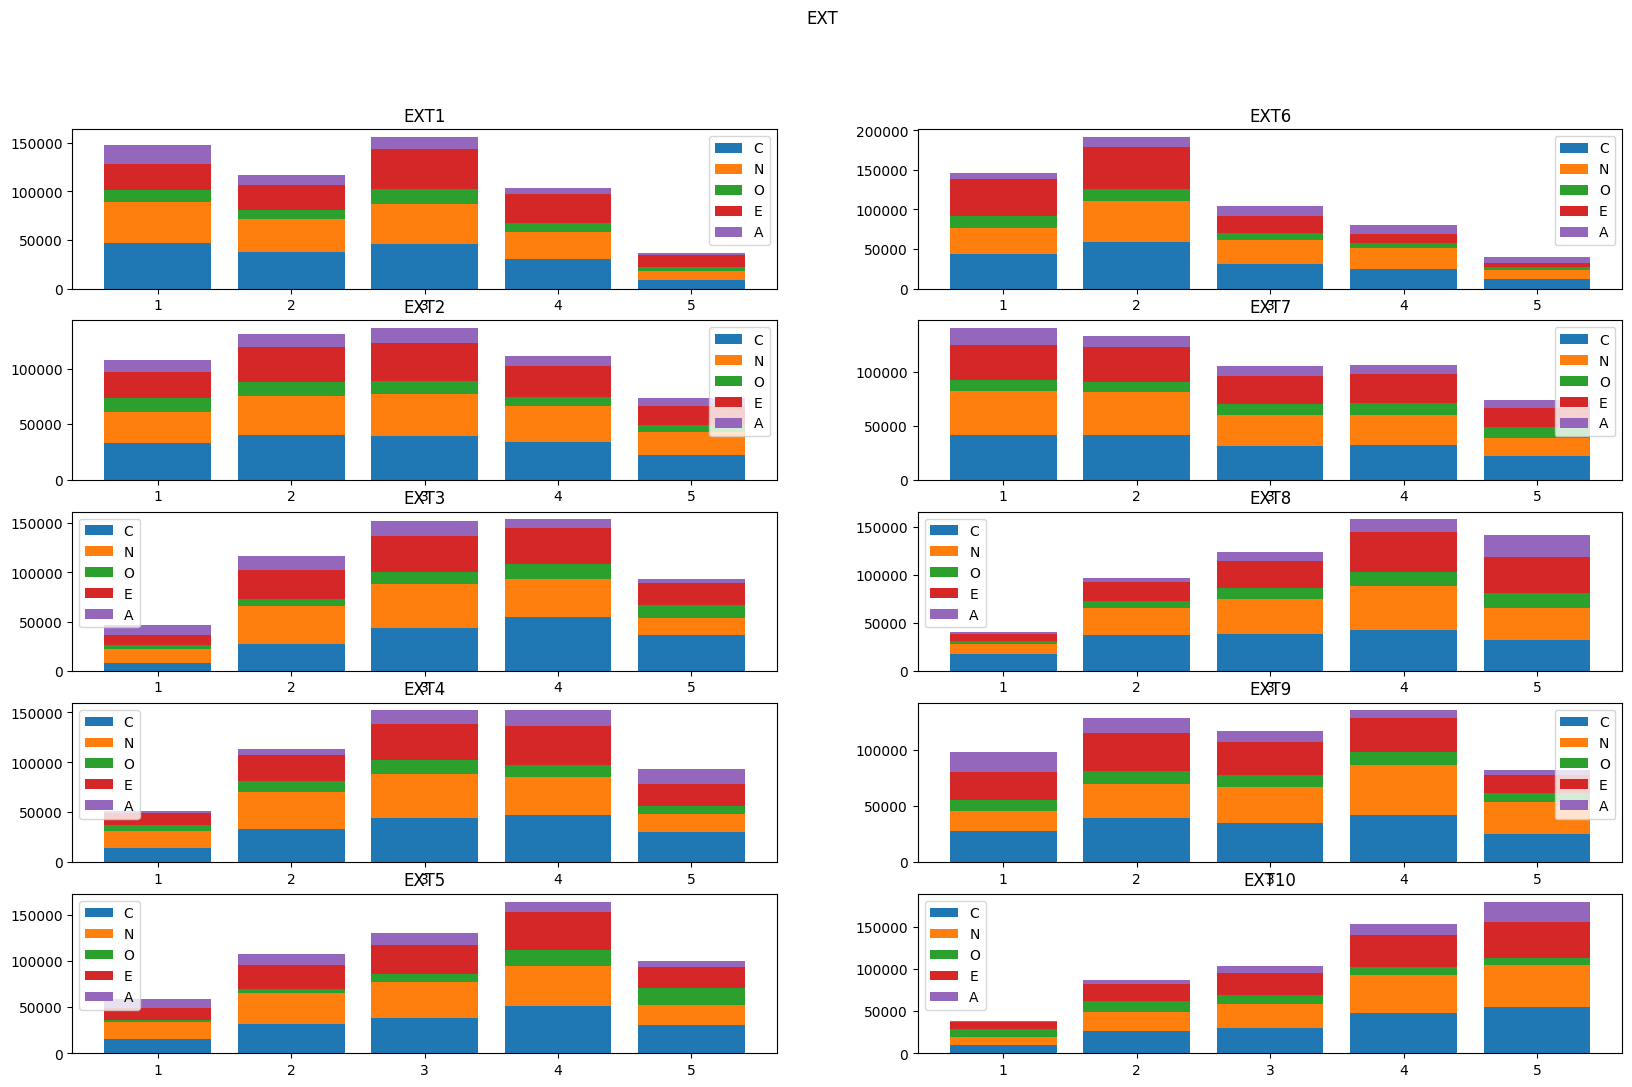

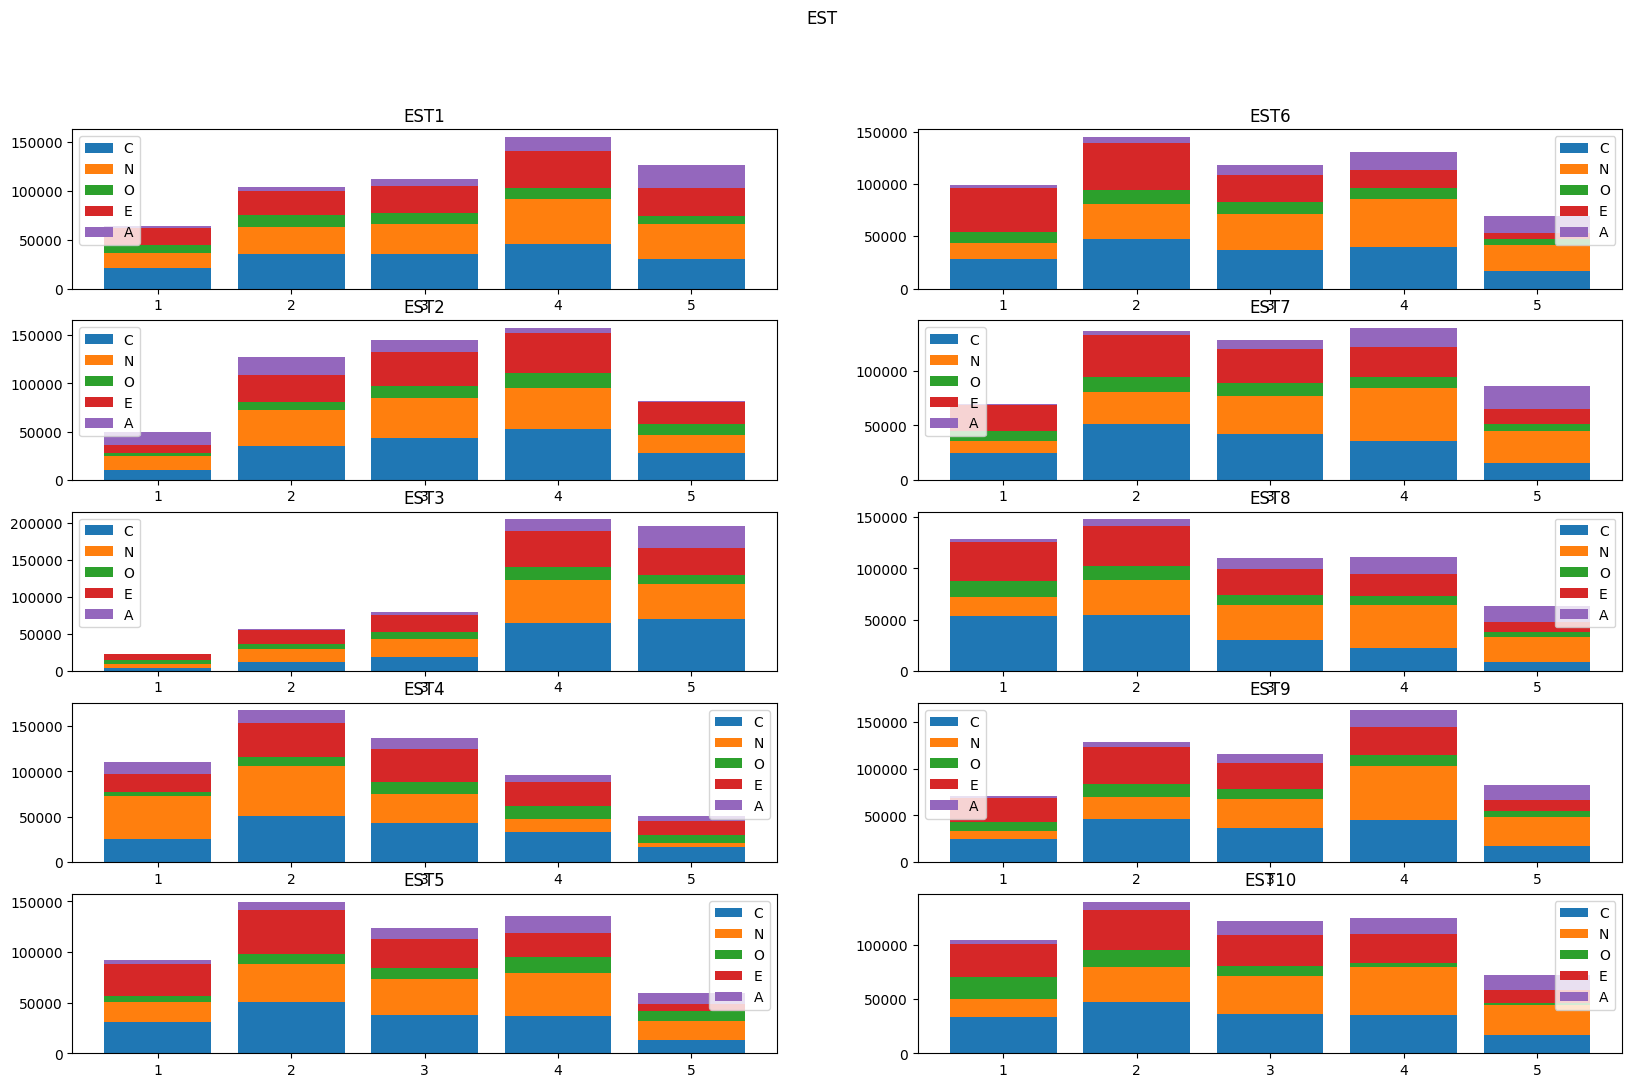

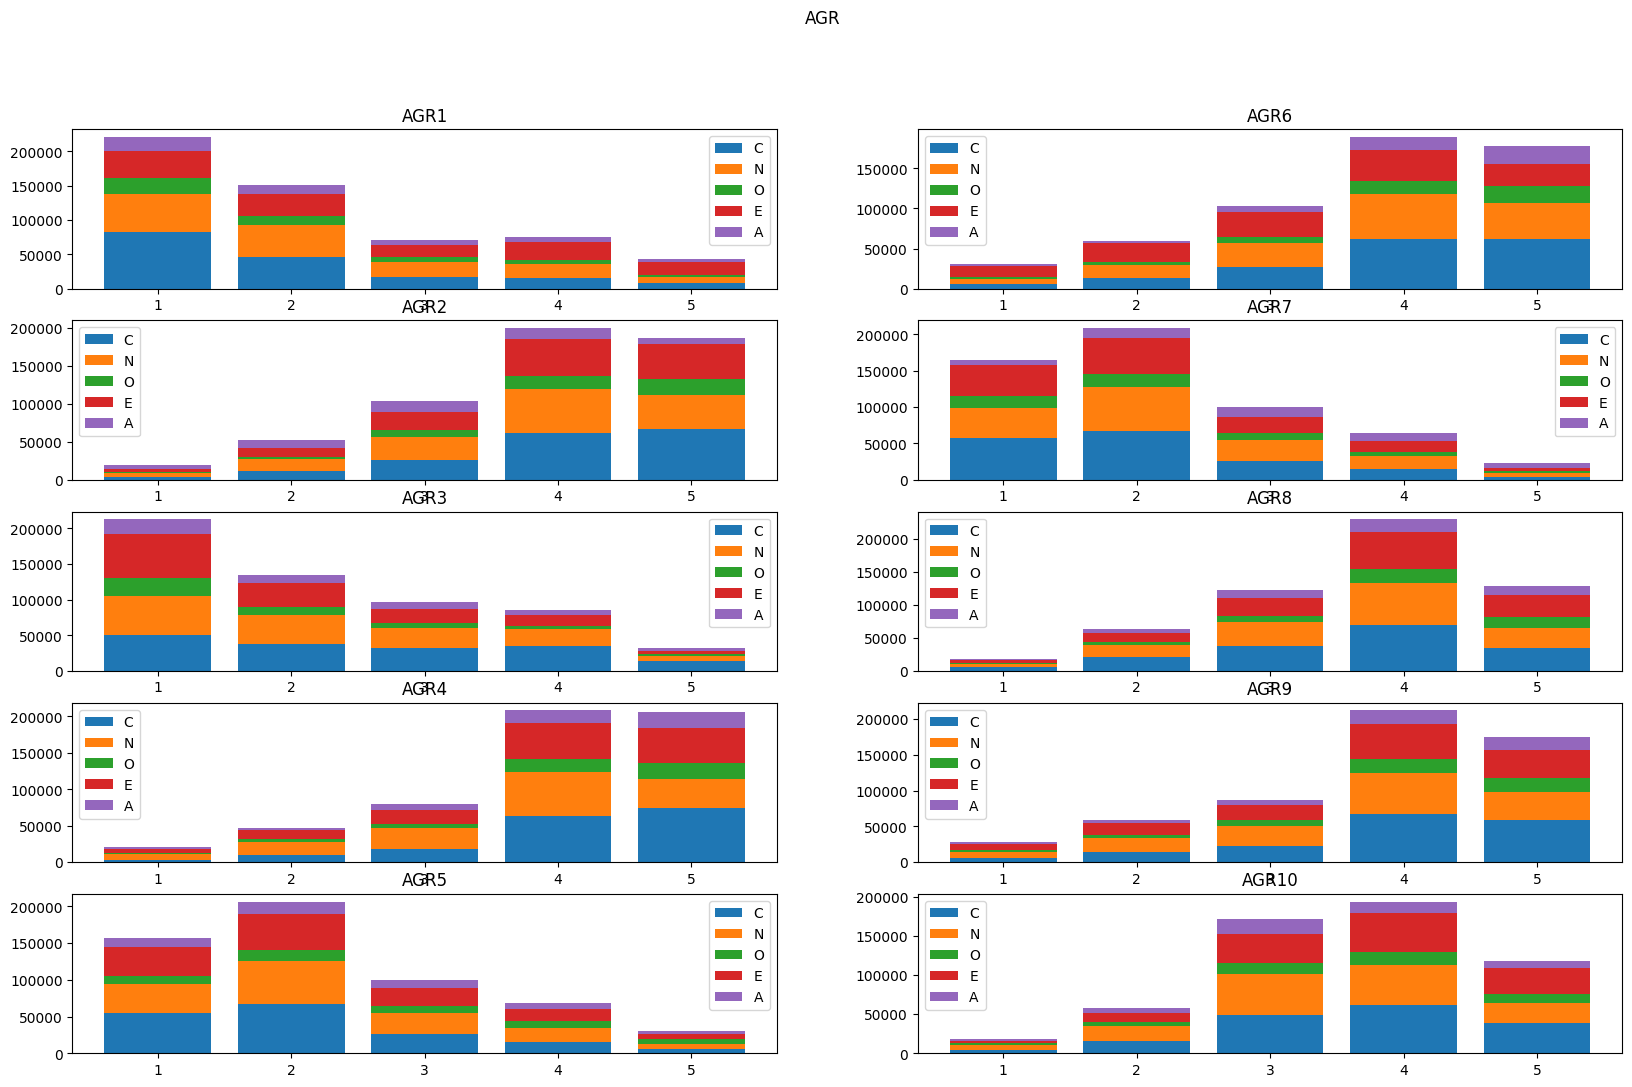

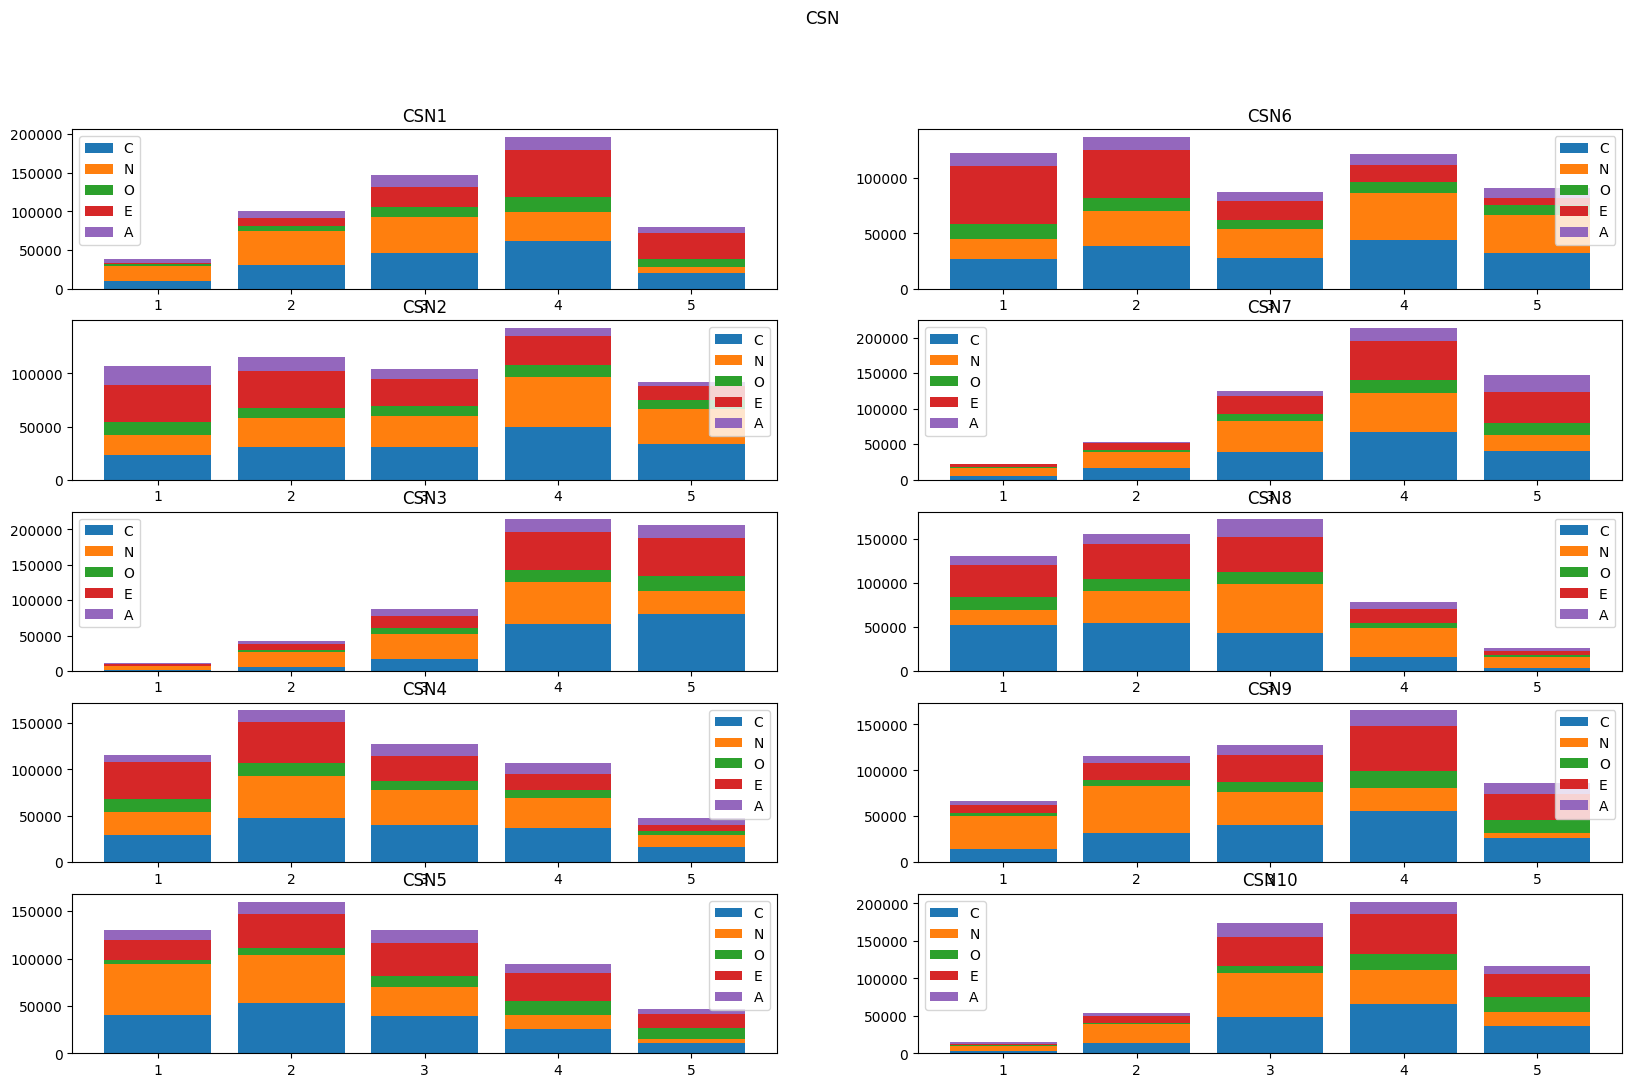

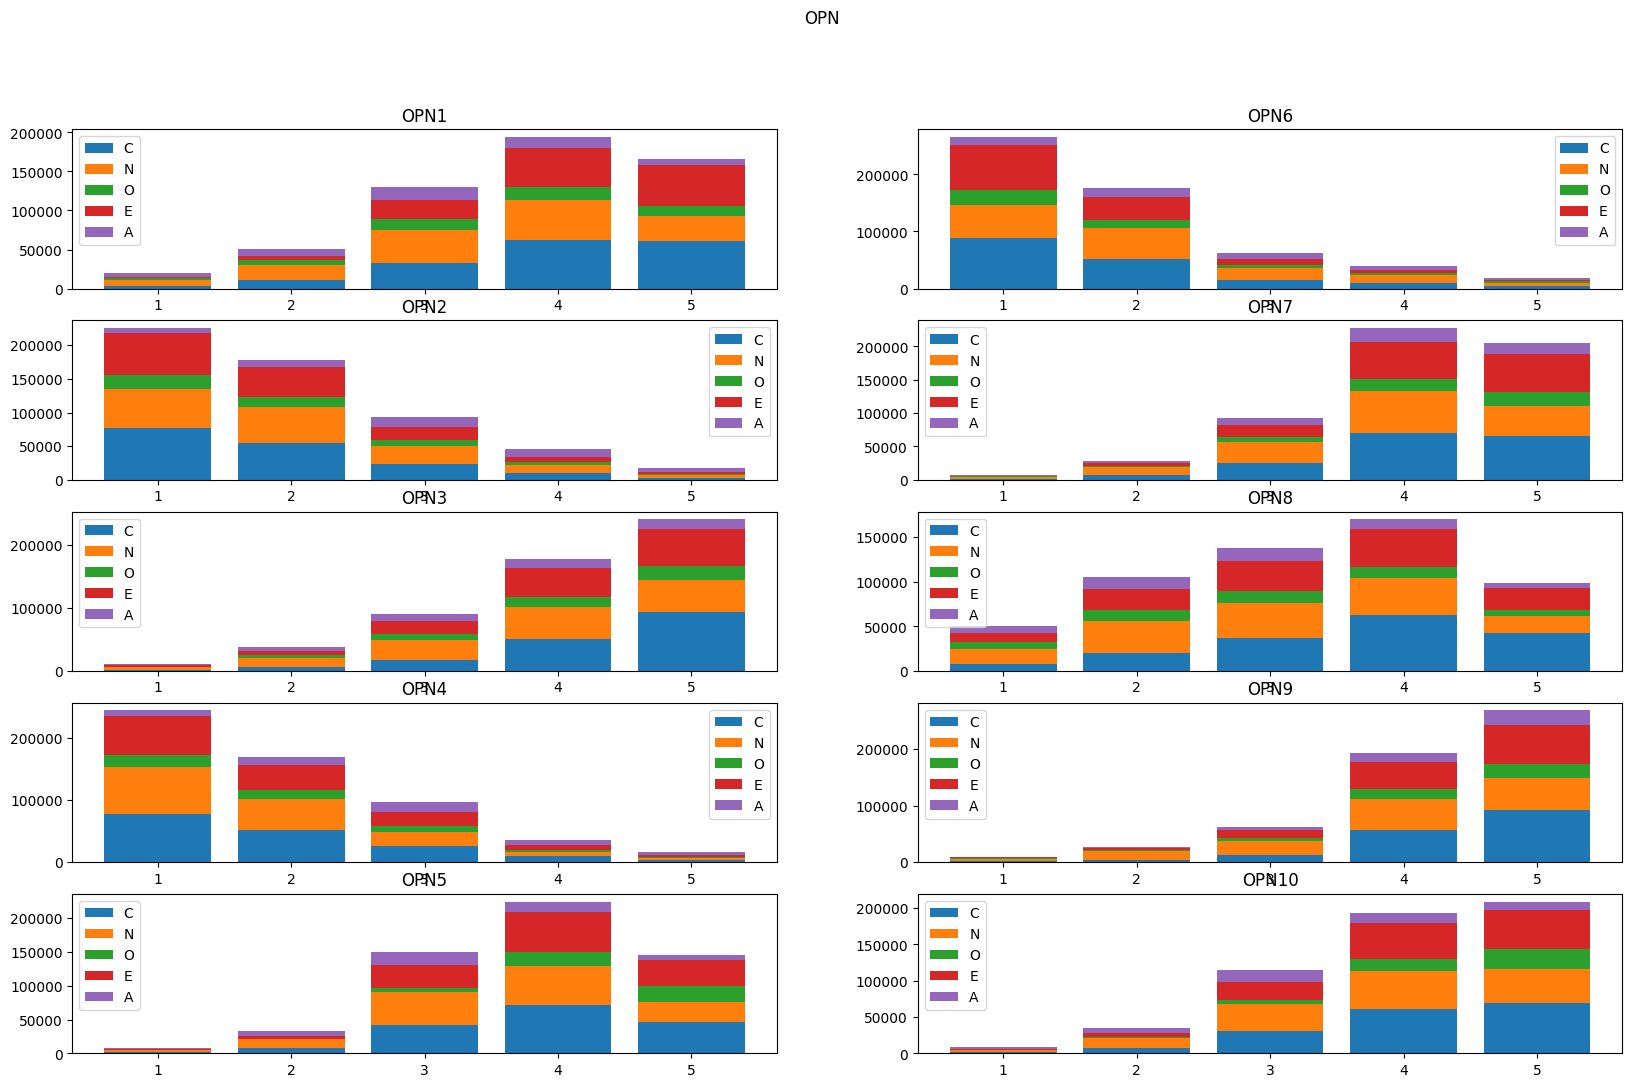

In [ ]:
catpoint_types = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
targets = question_Fivefac['target'].unique()
import numpy as np

for q in catpoint_types:
        questions = [f"{q}{i}" for i in range(1, 11)]
        fig, axis = plt.subplots(ncols=2, nrows=5, figsize=(20, 12))
        fig.suptitle(q)
        for i, question in enumerate(questions):
            row_idx = i % 5 
            col_idx = i // 5
            ax = axis[row_idx, col_idx]
            ax.set_title(question)
            targets_data = [question_Fivefac.loc[question_Fivefac['target'] == target, question].value_counts().sort_index() for target in targets]
            cumsum = np.cumsum(targets_data, axis=0)
            for j in range(len(targets_data)):
                if j == 0:
                    ax.bar(targets_data[j].index, targets_data[j], label=targets[j])
                else:
                    ax.bar(targets_data[j].index, targets_data[j], bottom=cumsum[j - 1], label=targets[j])
            ax.legend()

In [ ]:
stats_df= pd.DataFrame({'mean':question_Fivefac.mean(), 'sd':question_Fivefac.std(),'min':question_Fivefac.min(),
             'max':question_Fivefac.max(), 'median':question_Fivefac.median(), 'length':len(question_Fivefac),
             'Missing_values':question_Fivefac.isnull().sum()})
stats_df.T

,AGR1,AGR10,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,...,OPN10,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,target
mean,2.232008,3.597277,3.85645,2.267879,3.947841,2.301817,3.758257,2.233012,3.685909,3.792477,...,3.997035,2.021283,4.066609,1.951383,3.83392,1.87828,4.059169,3.285598,4.221461,NaN
sd,1.303506,1.035181,1.086239,1.264163,1.0805,1.155668,1.166108,1.112323,1.046487,1.140049,...,0.982034,1.083164,1.026641,1.058067,0.929487,1.072507,0.91865,1.211813,0.938797,NaN
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,O
median,2.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,...,4.0,2.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,NaN
length,561204,561204,561204,561204,561204,561204,561204,561204,561204,561204,...,561204,561204,561204,561204,561204,561204,561204,561204,561204,561204
Missing_values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Dropping colunms having participants responses
Fivefac.drop(Fivefac.columns[0:50], axis=1, inplace=True)
Fivefac.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,date_column,Countries,screen_size,device_type,Time consumed,Extroversion,Neuroticism,Openness,Conscientiousness,Agreeableness
3,8.624,2.872,5.600,3.152,5.775,1.753,4.208,5.648,7.136,1.704,...,2018-04-16 14:24:53,Philippines,2202.907170,Desktop,232.0,77.472,68.880,56.569,75.436,70.187
5,6.104,6.800,9.608,4.903,7.128,4.103,6.194,12.332,6.184,4.375,...,2016-12-12 11:20:14,Chile,1567.092850,Tab,282.0,99.731,71.008,77.147,81.534,68.324
6,18.124,3.265,4.351,5.213,4.557,3.280,7.985,8.316,3.831,14.332,...,2018-09-17 07:15:12,United States,765.188866,Mobile,341.0,104.254,78.844,95.621,109.249,90.697
9,415.090,6.274,5.648,6.534,2.266,2.662,5.214,4.602,4.116,2.524,...,2018-05-13 03:05:09,United States,1509.436981,Tab,828.0,487.930,129.458,91.686,102.984,130.336
10,9.913,4.850,3.067,5.149,2.818,2.657,21.011,6.667,5.437,4.240,...,2018-10-16 19:44:14,United States,734.302390,Mobile,369.0,97.809,92.772,95.844,89.582,108.473


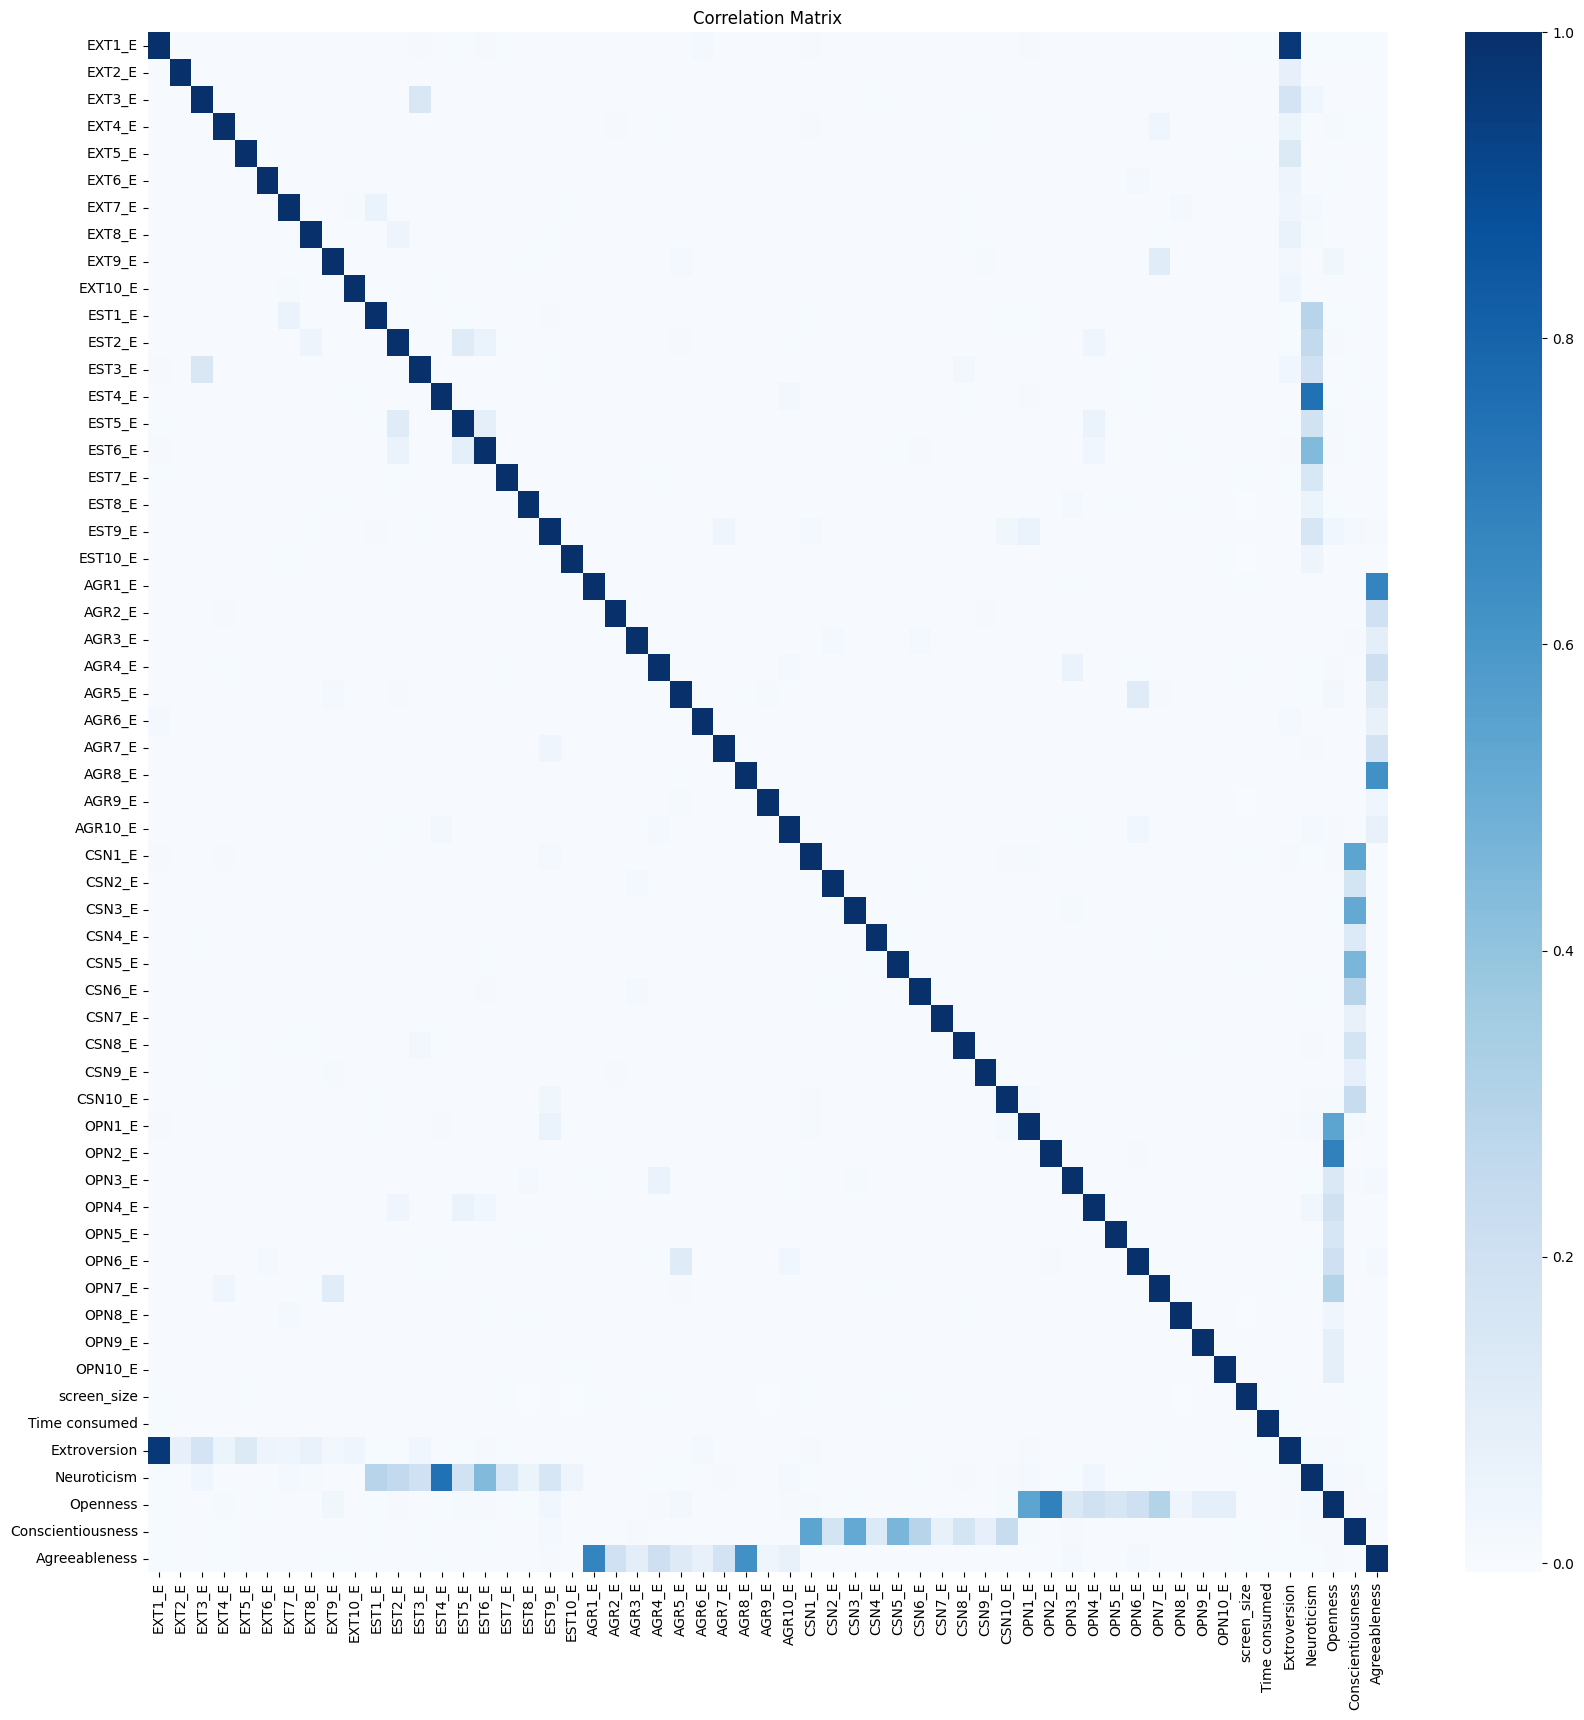

In [ ]:
corr = Fivefac.drop('target',axis=1).corr(method='pearson')
fig,ax = plt.subplots(1,1,figsize=(20,20))
sens.heatmap(corr,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

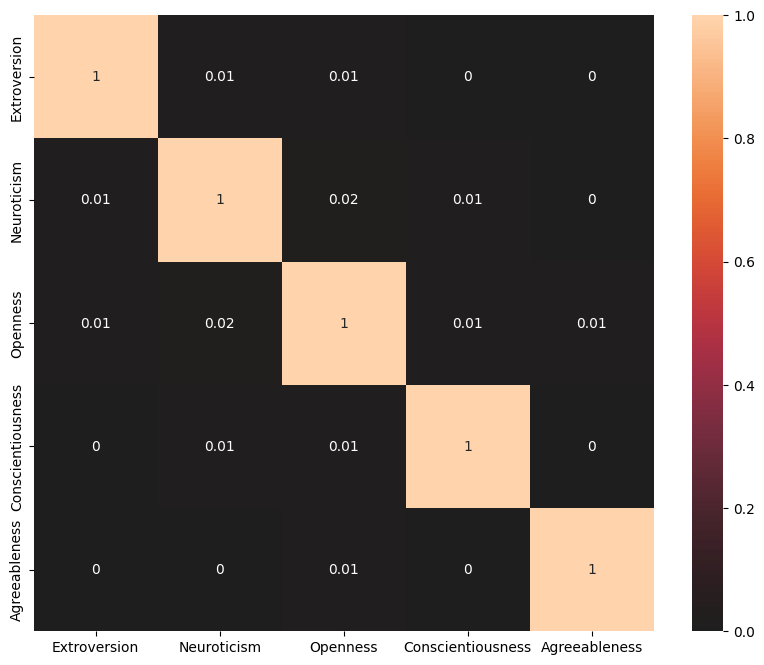

In [ ]:
#Heatmap of main factors
hmapdf = Fivefac[['Extroversion' ,'Neuroticism','Openness','Conscientiousness','Agreeableness']]
corrhe= hmapdf.corr().round(2)
pltt.figure(figsize=(10,8))  
sens.heatmap(corrhe,annot=True,center=0)

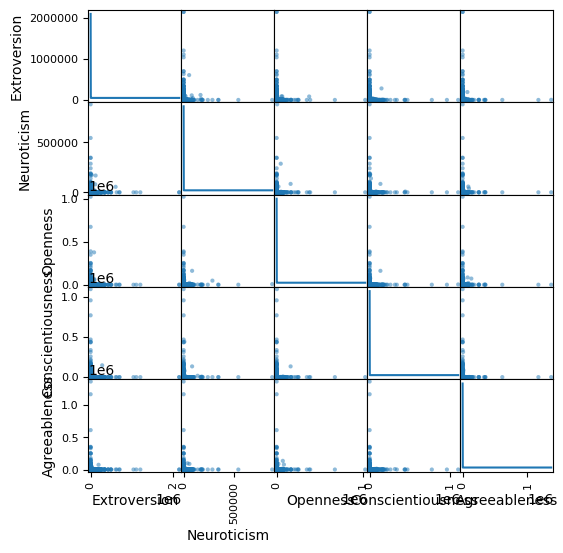

In [ ]:
from pandas.plotting import scatter_matrix, parallel_coordinates
axes = scatter_matrix(hmapdf, alpha = 0.5, figsize = (6,6), diagonal = 'kde')
try:
    corr = hmapdf.corr().values()

    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i,j].annotate('%.3f' %corr[i,j], (0.8,0.9),
                      xycoords = "axes fraction", ha ='center', va='center')
except Exception:
    pass
plt.show()

In [ ]:
Fivefac.iloc[:,50:].to_csv('Participants_Fivefac.csv', index=False)

In [ ]:
Fivefac.iloc[:,50:]

,target,date_column,Countries,screen_size,device_type,Time consumed,Extroversion,Neuroticism,Openness,Conscientiousness,Agreeableness
3,C,2018-04-16 14:24:53,Philippines,2202.907170,Desktop,232.0,77.472,68.880,56.569,75.436,70.187
5,C,2016-12-12 11:20:14,Chile,1567.092850,Tab,282.0,99.731,71.008,77.147,81.534,68.324
6,N,2018-09-17 07:15:12,United States,765.188866,Mobile,341.0,104.254,78.844,95.621,109.249,90.697
9,C,2018-05-13 03:05:09,United States,1509.436981,Tab,828.0,487.930,129.458,91.686,102.984,130.336
10,N,2018-10-16 19:44:14,United States,734.302390,Mobile,369.0,97.809,92.772,95.844,89.582,108.473
...,...,...,...,...,...,...,...,...,...,...,...
964568,N,2017-06-16 09:01:43,United States,1567.092850,Tab,111656.0,62.567,42.528,62.226,57.249,75.968
964569,C,2016-04-08 15:02:40,United States,844.447749,Tab,192.0,66.476,59.375,64.108,73.700,58.724
964570,N,2018-05-17 19:07:08,United States,765.188866,Mobile,139.0,57.458,47.867,51.591,54.667,54.246
964571,C,2018-07-08 16:45:34,United States,844.447749,Tab,443.0,130.324,84.410,60.357,68.427,69.587


In [ ]:
import pandas as pd
question_Fivefac = pd.read_csv("question_Fivefac.csv")

FileNotFoundError: ignored

In [ ]:
question_Fivefac.shape

In [ ]:
#question_Fivefac['target'] = Fivefac['target']
# Define the target variable and independent variables
target_variable = 'target'
independent_variables = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

# Compute the correlation coefficients between the target variable and each independent variable
correlation_matrix = question_Fivefac[independent_variables + [target_variable]].corr()

# Display the significant correlations
print('Correlation Matrix:')
correlation_matrix


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns,cmap='Blues', linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(question_Fivefac.drop(['target'], axis=1))

# Perform PCA to reduce the dimensionality of the predictors
pca = PCA()
pca.fit(predictors_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required for 95% of the variance: {num_components}")

# Project the data onto the top k principal components
pca = PCA(n_components=num_components)
predictors_pca = pca.fit_transform(predictors_scaled)

In [ ]:
predictors = question_Fivefac.drop(['target'], axis=1)
feature_names = predictors.columns

# Get the top 43 principal components
top_components = pca.components_[:43, :]

top_variable_indices = [list(abs(top_components[i]).argsort()[::-1][:43]) for i in range(43)]

top_variable_names = [[feature_names[index] for index in indices] for indices in top_variable_indices]

# Print the names of the top 43 variables for each principal component
for i, component in enumerate(top_variable_names):
    print(f"Top 43 variables for Principal Component {i+1}: {', '.join(component)}")

In [ ]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance':pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = [f'PC{i}' for i in range(1, 44)]
pcsSummary.round(3)

In [ ]:
listpca=top_variable_names[42]

In [ ]:
questionpcs_Fivefac = question_Fivefac[listpca]

In [ ]:
questionpcs_Fivefac['target'] = question_Fivefac['target']
questionpcs_Fivefac

In [ ]:
under_traimo = {}
Over_traimo = {}

models_under = {}
models_Over ={}

under_traimopca = {}
Over_traimopca = {}

models_underpca = {}
models_Overpca ={}

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X, y = question_Fivefac.drop('target',axis=1), question_Fivefac['target']
X_pca, y_pca = questionpcs_Fivefac.drop('target',axis=1), questionpcs_Fivefac['target']
# Perform random undersampling
rus = RandomUnderSampler()
X_undersampled, y_undersampled = rus.fit_resample(X, y)
X_undersampledpca, y_undersampledpca = rus.fit_resample(X_pca, y_pca)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0, shuffle=True, stratify = y)
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(X_pca, y_pca, test_size=0.2, 
                                                    random_state=0, shuffle=True, stratify = y_pca)

Once we have performed undersampling or oversampling, we can proceed to implement the following models:

**1.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model to make predictions
lr_model = LogisticRegression(solver='lbfgs', max_iter=150)

lr_model.fit(X_undersampled, y_undersampled)  
y_pred_lr = lr_model.predict(X_test)

under_traimo['UnderLogistic'] = lr_model
models_under['predlr'] = y_pred_lr

lr_modelpca = LogisticRegression(solver='lbfgs', max_iter=150)
lr_modelpca.fit(X_undersampledpca, y_undersampledpca)  
y_pred_lrpca = lr_modelpca.predict(X_testpca)

under_traimopca['UnderLogistic'] = lr_modelpca
models_underpca['predlr'] = y_pred_lrpca

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the models
dtc_model = DecisionTreeClassifier()
knc_model = KNeighborsClassifier()
nb_model = GaussianNB()
nn_model = MLPClassifier()
lda_model = LinearDiscriminantAnalysis()

# Train the models on the undersampled data
dtc_model.fit(X_undersampled, y_undersampled)
knc_model.fit(X_undersampled, y_undersampled)
nb_model.fit(X_undersampled, y_undersampled)
nn_model.fit(X_undersampled, y_undersampled)
lda_model.fit(X_undersampled, y_undersampled)

# Make predictions on the test data
y_pred_dtc = dtc_model.predict(X_test)
y_pred_knc = knc_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)
y_pred_lda = lda_model.predict(X_test)

# Store the models and predictions in dictionaries
under_traimo['UnderDecisionTree'] = dtc_model
models_under['preddtc'] = y_pred_dtc

under_traimo['UnderKNeighbors'] = knc_model
models_under['predknc'] = y_pred_knc

under_traimo['UnderNaiveBayes'] = nb_model
models_under['prednb'] = y_pred_nb

under_traimo['UnderNeuralNetwork'] = nn_model
models_under['prednn'] = y_pred_nn

under_traimo['UnderLDA'] = lda_model
models_under['predlda'] = y_pred_lda


# Repeat for the PCA dataset
dtc_modelpca = DecisionTreeClassifier()
knc_modelpca = KNeighborsClassifier()
nb_modelpca = GaussianNB()
nn_modelpca = MLPClassifier()
lda_modelpca = LinearDiscriminantAnalysis()

dtc_modelpca.fit(X_undersampledpca, y_undersampledpca)
knc_modelpca.fit(X_undersampledpca, y_undersampledpca)
nb_modelpca.fit(X_undersampledpca, y_undersampledpca)
nn_modelpca.fit(X_undersampledpca, y_undersampledpca)
lda_modelpca.fit(X_undersampledpca, y_undersampledpca)

y_pred_dtcpca = dtc_modelpca.predict(X_testpca)
y_pred_kncpca = knc_modelpca.predict(X_testpca)
y_pred_nbpca = nb_modelpca.predict(X_testpca)
y_pred_nnpca = nn_modelpca.predict(X_testpca)
y_predLDAPCA = lda_modelpca.predict(X_testpca)

under_traimopca['UnderDecisionTree'] = dtc_modelpca
models_underpca['preddtcpca'] = y_pred_dtcpca

under_traimopca['UnderKNeighbors'] = knc_modelpca
models_underpca['predkncpca'] = y_pred_kncpca

under_traimopca['UnderNaiveBayes'] = nb_modelpca
models_underpca['prednbpca'] = y_pred_nbpca

under_traimopca['UnderNeuralNetwork'] = nn_modelpca
models_underpca['prednnpca'] =y_pred_nnpca

under_traimo['UnderLDApca'] = lda_modelpca
models_under['predlda'] = y_predLDAPCA

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def errorsis(y_pred,modelname):
    # Calculate accuracy
    print("Accuracy score of "+ modelname +"\n")
    print(accuracy_score(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    print("Classification report of "+ modelname +"\n")
    print(classification_report(y_test, y_pred))

    # Calculate the confusion matrix
    print("Confusion matrix "+ modelname +"\n")
    print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def pr_roc_curves_multiclass(estimator,X,y,label = None):
    # Binarize the output
    y = label_binarize(y, classes=list(estimator.classes_))
    n_classes = y.shape[1]

    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=0,
                                                        shuffle=True,stratify = y)

    # Learn to predict each class against the other
    y_score = estimator.decision_function(X_test)
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area and aggregate all false positive rates
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        
    # Average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    
    # Setup plot details
    fig, ax = plt.subplots(figsize=(16,8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','darkviolet','gold','blue'])
    lw = 2

    # Plot Precision - Recall curves
    # Plot iso-F1 curves
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = ax.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        ax.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    
    # Plot ROC Curves
    ax.plot(fpr["micro"], tpr["micro"],
             color='deeppink', linestyle=':', linewidth=4,
             label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]))

    ax.plot(fpr["macro"], tpr["macro"],
             color='navy', linestyle=':', linewidth=4,
             label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]))

    
    for i, color in zip(range(n_classes), colors):
        class_ref = list(estimator.classes_)[i]
        
        # Same for ROC curves
        ax.plot(fpr[i], tpr[i], color=color, lw=lw,
                   label='ROC curve of class {0} (area = {1:0.2f})'''.format(class_ref,roc_auc[i]))

    
    
    ax.plot([0, 1], [0, 1], 'k--', lw=lw)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate',fontsize=12)
    ax.set_ylabel('True Positive Rate',fontsize=12)
    ax.set_title(f'ROC Curve - {type(estimator).__name__} {label}',fontsize=12)
    ax.legend(loc=(0, -.45), prop=dict(size=12),frameon=False,fontsize=12)

    plt.show()

**Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X, y = question_Fivefac.drop('target',axis=1), question_Fivefac['target']
X_pca, y_pca = questionpcs_Fivefac.drop('target',axis=1), questionpcs_Fivefac['target']
# Perform random Oversampling
rus = RandomOverSampler()
X_Oversampled, y_Oversampled = rus.fit_resample(X, y)
X_Oversampledpca, y_Oversampledpca = rus.fit_resample(X_pca, y_pca)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0, shuffle=True, stratify = y)
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(X_pca, y_pca, test_size=0.2, 
                                                    random_state=0, shuffle=True, stratify = y_pca)

from sklearn.linear_model import LogisticRegression

# Create the model to make predictions
lr_model = LogisticRegression(solver='lbfgs', max_iter=150)

lr_model.fit(X_Oversampled, y_Oversampled)  
y_pred_lr = lr_model.predict(X_test)

Over_traimo['OverLogistic'] = lr_model
models_Over['predlr'] = y_pred_lr

lr_modelpca = LogisticRegression(solver='lbfgs', max_iter=150)
lr_modelpca.fit(X_Oversampledpca, y_Oversampledpca)  
y_pred_lrpca = lr_modelpca.predict(X_testpca)

Over_traimopca['OverLogistic'] = lr_modelpca
models_Overpca['predlr'] = y_pred_lrpca

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the models
dtc_model = DecisionTreeClassifier()
knc_model = KNeighborsClassifier()
nb_model = GaussianNB()
nn_model = MLPClassifier()
lda_model = LinearDiscriminantAnalysis()

# Train the models on the Oversampled data
dtc_model.fit(X_Oversampled, y_Oversampled)
knc_model.fit(X_Oversampled, y_Oversampled)
nb_model.fit(X_Oversampled, y_Oversampled)
nn_model.fit(X_Oversampled, y_Oversampled)
lda_model.fit(X_Oversampled, y_Oversampled)

# Make predictions on the test data
y_pred_dtc = dtc_model.predict(X_test)
y_pred_knc = knc_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)
y_pred_lda = lda_model.predict(X_test)

# Store the models and predictions in dictionaries
Over_traimo['OverDecisionTree'] = dtc_model
models_Over['preddtc'] = y_pred_dtc

Over_traimo['OverKNeighbors'] = knc_model
models_Over['predknc'] = y_pred_knc

Over_traimo['OverNaiveBayes'] = nb_model
models_Over['prednb'] = y_pred_nb

Over_traimo['OverNeuralNetwork'] = nn_model
models_Over['prednn'] = y_pred_nn

Over_traimo['OverLDA'] = lda_model
models_Over['predlda'] = y_pred_lda


# Repeat for the PCA dataset
dtc_modelpca = DecisionTreeClassifier()
knc_modelpca = KNeighborsClassifier()
nb_modelpca = GaussianNB()
nn_modelpca = MLPClassifier()
lda_modelpca = LinearDiscriminantAnalysis()

dtc_modelpca.fit(X_Oversampledpca, y_Oversampledpca)
knc_modelpca.fit(X_Oversampledpca, y_Oversampledpca)
nb_modelpca.fit(X_Oversampledpca, y_Oversampledpca)
nn_modelpca.fit(X_Oversampledpca, y_Oversampledpca)
lda_modelpca.fit(X_Oversampledpca, y_Oversampledpca)

y_pred_dtcpca = dtc_modelpca.predict(X_testpca)
y_pred_kncpca = knc_modelpca.predict(X_testpca)
y_pred_nbpca = nb_modelpca.predict(X_testpca)
y_pred_nnpca = nn_modelpca.predict(X_testpca)
y_predLDAPCA = lda_modelpca.predict(X_testpca)

Over_traimopca['OverDecisionTree'] = dtc_modelpca
models_Overpca['preddtcpca'] = y_pred_dtcpca

Over_traimopca['OverKNeighbors'] = knc_modelpca
models_Overpca['predkncpca'] = y_pred_kncpca

Over_traimopca['OverNaiveBayes'] = nb_modelpca
models_Overpca['prednbpca'] = y_pred_nbpca

Over_traimopca['OverNeuralNetwork'] = nn_modelpca
models_Overpca['prednnpca'] =y_pred_nnpca

Over_traimo['OverLDApca'] = lda_modelpca
models_Over['predlda'] = y_predLDAPCA

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for i, j in models_under.items():
    errorsis(j,i)

In [ ]:
for i, j in models_underpca.items():
    errorsis(j,i)

In [ ]:
for i, j in models_Over.items():
    errorsis(j,i)

In [ ]:
for i, j in models_Overpca.items():
    errorsis(j,i)

In [ ]:
from scipy import interp
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle
pr_roc_curves_multiclass(under_traimo['UnderLogistic'],X_undersampled,y_undersampled, label = '\nUndersampled Dataset')

In [ ]:
under_traimo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, precision_recall_curve

def plot_lift_curve(clf, X_test, y_test, name='Classifier'):
    # Predict probabilities for test set
    y_prob = clf.predict_proba(X_test)

    # Get precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.ravel(), y_prob[:, 1].ravel())

    # Calculate ratios for lift curve
    lift_ratio = (recall / np.mean(y_test))

    # Calculate area under curve (AUC)
    auc_score = auc(lift_ratio, precision)

    # Plot lift curve
    plt.plot(lift_ratio, precision, label='{} (AUC = {:.3f})'.format(name, auc_score))
    plt.xlabel('Lift Ratio')
    plt.ylabel('Precision')
    plt.title('Lift Curve')
    plt.legend(loc='best')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Get the true labels for the test set
y_true=label_encoder.fit_transform(y_true)
y_true = y_test.values
# Get the predicted probabilities for each model
y_pred_probs_lr = lr_model.predict_proba(X_test)
y_pred_probs_dtc = dtc_model.predict_proba(X_test)
y_pred_probs_knc = knc_model.predict_proba(X_test)
y_pred_probs_nb = nb_model.predict_proba(X_test)
y_pred_probs_nn = nn_model.predict_proba(X_test)
y_pred_probs_lda = lda_model.predict_proba(X_test)

# Combine the predicted probabilities into one array
y_pred_probs = np.stack((y_pred_probs_lr, y_pred_probs_dtc, y_pred_probs_knc, y_pred_probs_nb, y_pred_probs_nn, y_pred_probs_lda), axis=-1)

# Sort the predicted probabilities for each observation in descending order
sorted_probs = np.sort(y_pred_probs, axis=0)[::-1]

# Get the true labels for the test set
y_true=label_encoder.fit_transform(y_true)
y_true = y_test.values

# Calculate the cumulative number of observations and the cumulative number of correct predictions for each class
cumulative_obs = np.arange(1, len(y_true) + 1)
cumulative_correct = np.zeros((len(y_true), 6))

for i in range(6):
    for j in range(len(y_true)):
        if np.argmax(sorted_probs[j,:,i]) == y_true[j]:
            cumulative_correct[j:,i] += 1

# Plot the gain chart
plt.figure(figsize=(8, 6))
plt.plot(cumulative_obs/(cumulative_obs[-1]*10), cumulative_correct[:,0]/cumulative_correct[-1,0], label='Logistic Regression')
plt.plot(cumulative_obs/(cumulative_obs[-1]*10), cumulative_correct[:,1]/cumulative_correct[-1,1], label='Decision Tree')
plt.plot(cumulative_obs/(cumulative_obs[-1]*10), cumulative_correct[:,2]/cumulative_correct[-1,2], label='K Neighbors')
plt.plot(cumulative_obs/(cumulative_obs[-1]*10), cumulative_correct[:,3]/cumulative_correct[-1,3], label='Naive Bayes')
plt.plot(cumulative_obs/(cumulative_obs[-1]*10), cumulative_correct[:,4]/cumulative_correct[-1,4], label='Neural Network')
plt.plot(cumulative_obs/(cumulative_obs[-1]*10), cumulative_correct[:,5]/cumulative_correct[-1,5], label='LDA')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Cumulative Fraction of Observations')
plt.ylabel('Cumulative Fraction of Correct Predictions')
plt.title('Gain Chart - Oversampled Data')
plt.legend()
plt.show()


In [ ]:
# Define a function to create the gain chart
def gain_chart(y_true, y_proba, title):
    
    # Create a sorted array of the true labels and corresponding predicted probabilities
    sort_idx = np.argsort(y_proba)[::-1]
    y_true_sorted = y_true[sort_idx]
    y_proba_sorted = y_proba[sort_idx]
    
    # Compute the cumulative sums of the true labels and predicted probabilities
    cumsum_true = np.cumsum(y_true_sorted)
    cumsum_proba = np.cumsum(y_proba_sorted)
    
    # Compute the total number of positive labels and the total number of samples
    n_pos = np.sum(y_true)
    n_samples = len(y_true)
    
    # Compute the random gain line and the perfect gain line
    random_gain = np.linspace(0, n_pos, n_samples)
    perfect_gain = cumsum_true / n_pos
    
    # Compute the actual gain line
    actual_gain = cumsum_true / n_pos - cumsum_proba / n_samples
    
    # Plot the gain chart
    plt.plot(np.linspace(0, 1, n_samples), random_gain, label='Random')
    plt.xlabel('Number of samples')
    plt.ylabel('Cumulative gain')
    plt.title(title)
    plt.legend()
    plt.show()
names=['Logistic Regression', 
          'Decision Tree', 
          'K-Nearest Neighbors',  
          'Neural Network', 
       'Naive Bayes',
          'LDA']
# Call the gain_chart function for each model
models = {'OverLogistic': models_Over['predlr'], 
          'OverDecisionTree': models_Over['preddtc'], 
          'OverKNeighbors': models_Over['predknc'], 
          'OverNaiveBayes': models_Over['prednb'], 
          'OverNeuralNetwork': models_Over['prednn'], 
          'OverLDA': models_Over['predlda']}
for model_name, y_pred in models.items():
    y_proba = Over_traimo[model_name].predict_proba(X_test)[:, 1]
    gain_chart(y_test, y_proba, title=names)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np


# binarize the labels
y_bin = label_binarize(y_undersampled, classes=np.unique(y_undersampled))
# predict probabilities for the test data
y_pred_prob = under_traimo['UnderNeuralNetwork'].predict_proba(X_undersampled)

# calculate the false positive rate, true positive rate, and threshold values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(under_traimo['UnderNeuralNetwork'].classes_.size):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# calculate the micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot the ROC curves for each class and the micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))
colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(under_traimo['UnderNeuralNetwork'].classes_.size), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# plot the baseline model
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve /n Undersampled Neural Network')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np


# binarize the labels
y_bin = label_binarize(y_Oversampledpca, classes=np.unique(y_Oversampledpca))
# predict probabilities for the test data
y_pred_prob = Over_traimopca['OverDecisionTree'].predict_proba(X_Oversampledpca)

# calculate the false positive rate, true positive rate, and threshold values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Over_traimopca['OverDecisionTree'].classes_.size):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# calculate the micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot the ROC curves for each class and the micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))
colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(Over_traimopca['OverDecisionTree'].classes_.size), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# plot the baseline model
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of /n Oversampled Decision Tree PCA')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np


# binarize the labels
y_bin = label_binarize(y_Oversampled, classes=np.unique(y_Oversampled))
# predict probabilities for the test data
y_pred_prob = Over_traimo['OverDecisionTree'].predict_proba(X_Oversampled)

# calculate the false positive rate, true positive rate, and threshold values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Over_traimo['OverDecisionTree'].classes_.size):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# calculate the micro-average ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot the ROC curves for each class and the micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))
colors = ['blue', 'red', 'green', 'purple']
for i, color in zip(range(Over_traimo['OverDecisionTree'].classes_.size), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# plot the baseline model
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve /n Oversampled Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate random multiclass dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=5, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define six models
models = [("Model 1", RandomForestClassifier()), 
          ("Model 2", LogisticRegression()), 
          ("Model 3", GradientBoostingClassifier()), 
          ("Model 4", DecisionTreeClassifier()), 
          ("Model 5", KNeighborsClassifier()), 
          ("Model 6", MLPClassifier())]

# Train and evaluate models
train_scores = []
test_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_scores.append(accuracy_score(y_train, train_pred))
    test_pred = model.predict(X_test)
    test_scores.append(accuracy_score(y_test, test_pred))

# Sort models by test accuracy
sorted_models = [x for _, x in sorted(zip(test_scores, models), reverse=True)]

# Compute cumulative gains
num_samples = len(y_test)
random_gains = np.linspace(0, 1, num_samples)
model_gains = []
for i, (name, model) in enumerate(sorted_models):
    pred_prob = model.predict_proba(X_test)
    order = np.argsort(-pred_prob, axis=1)
    sorted_pred_prob = pred_prob[np.arange(num_samples)[:,None], order]
    class_labels = np.unique(y)
    class_ranks = np.argmax(order == y_test.reshape(-1,1), axis=1)
    class_gains = np.zeros(num_samples)
    for j in range(num_samples):
        class_gains[j] = np.sum(sorted_pred_prob[j][:class_ranks[j]+1]) / np.sum(sorted_pred_prob[j])
    model_gains.append(class_gains)

# Plot gain chart
plt.figure(figsize=(8,6))
plt.plot(np.arange(num_samples), random_gains, label='Random Model')
for i, (name, model) in enumerate(sorted_models):
    plt.plot(np.arange(num_samples), np.cumsum(model_gains[i]), label=name)
plt.xlabel('Number of samples')
plt.ylabel('Cumulative gain')
plt.legend()
plt.show()


In [ ]:
model = Over_traimo['OverNeuralNetwork']

In [ ]:
import pandas as pd
df_test = pd.read_csv('/content/drive/MyDrive/Big-Five_Factors.csv', delimiter='\t')


In [ ]:
df_test = df_test[df_test['IPC']==1]
df_test = df_test.dropna()
df_test = df_test.iloc[0:1000,0:50]

df_test.shape

In [ ]:
results = pd.DataFrame(model.predict(df_test))
results.rename(columns = {0:'Class'},inplace = True)
target_classes = list(question_Fivefac['target'].unique())


In [ ]:
sns.countplot(x="Class", data=results);
plt.title('Test Data')
plt.show()